In [3]:
import sklearn
from sklearn.datasets import load_digits
digits=load_digits()


In [4]:
print("Image Data Shape",digits.data.shape)

Image Data Shape (1797, 64)


In [5]:
print("Label Data Shape", digits.target.shape)

Label Data Shape (1797,)


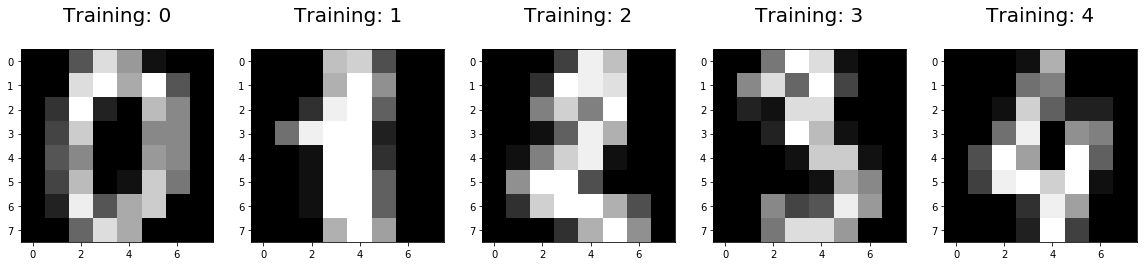

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(digits.data[0:5],
                                         digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' %label, fontsize = 20)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression


In [10]:
logisticRegr=LogisticRegression()

In [11]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logisticRegr.predict (x_test[0].reshape(1,-1))

array([2])

In [14]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
predictions=logisticRegr.predict(x_test)

In [18]:
#R-squared score
score=logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [20]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [22]:
cm=metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


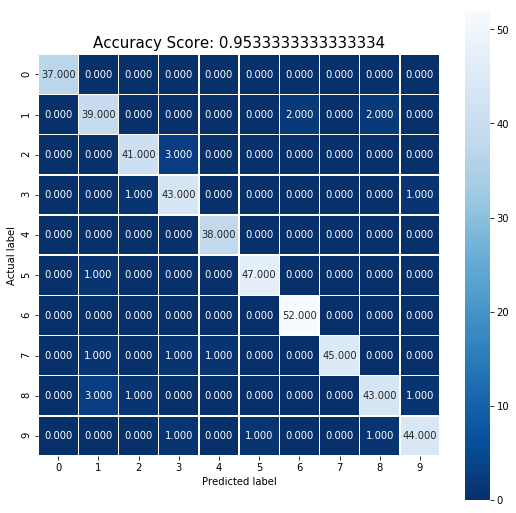

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

NameError: name 'xrange' is not defined

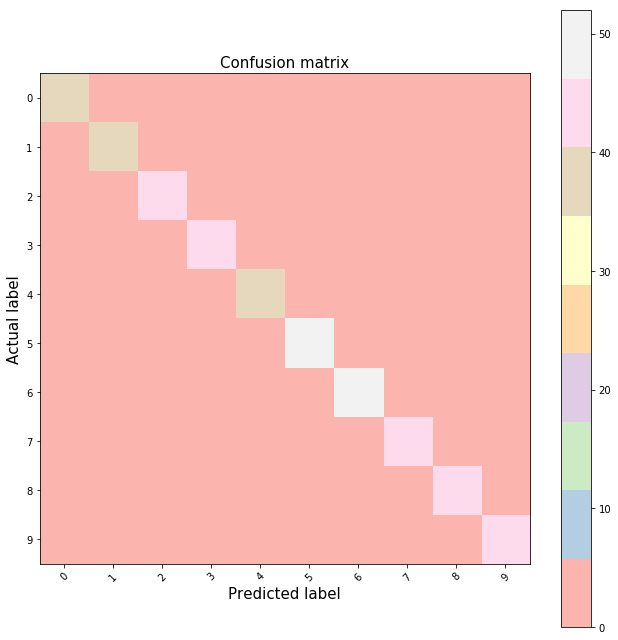

In [28]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in xrange(width):
  for y in xrange(height):
   plt.annotate(str(cm[x][y]), xy=(y, x), 
   horizontalalignment='center',
   verticalalignment='center')
